In [12]:
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## 1. 灰度化

### 1.1.手动实现

In [13]:
img = cv2.imread('lenna.png') # (512, 512, 3)，直接读入的数据是带有颜色层的，是彩色的
h,w = img.shape[:2]  #获取图片的high和wide
img_gray = np.zeros([h,w],img.dtype)  #创建一张和当前图片大小一样的单通道图片

In [14]:
for i in range(h):
    for j in range(w):
        m = img[i,j] #取出当前high和wide中的BGR坐标，[0.8862745 , 0.5372549 , 0.49019608]
        img_gray[i,j] = int(m[0]*0.11 + m[1]*0.59 + m[2]*0.3)   #将BGR坐标转化为gray坐标并赋值给新图像
print (img_gray)
print("image show gray: %s"%img_gray)
cv2.imshow("image show gray",img_gray)
cv2.waitKey() # 如果不加这个，出不来哦

[[162 162 162 ... 169 155 128]
 [162 162 162 ... 169 155 128]
 [162 162 162 ... 169 155 128]
 ...
 [ 42  42  49 ... 104 100  98]
 [ 43  43  54 ... 103 105 108]
 [ 43  43  54 ... 103 105 108]]
image show gray: [[162 162 162 ... 169 155 128]
 [162 162 162 ... 169 155 128]
 [162 162 162 ... 169 155 128]
 ...
 [ 42  42  49 ... 104 100  98]
 [ 43  43  54 ... 103 105 108]
 [ 43  43  54 ... 103 105 108]]


-1

### 1.2.调包实现

---image lenna----
[[[0.8862745  0.5372549  0.49019608]
  [0.8862745  0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156866]
  ...
  [0.9019608  0.5803922  0.47843137]
  [0.8666667  0.50980395 0.43137255]
  [0.78431374 0.3882353  0.3529412 ]]

 [[0.8862745  0.5372549  0.49019608]
  [0.8862745  0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156866]
  ...
  [0.9019608  0.5803922  0.47843137]
  [0.8666667  0.50980395 0.43137255]
  [0.78431374 0.3882353  0.3529412 ]]

 [[0.8862745  0.5372549  0.49019608]
  [0.8862745  0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156866]
  ...
  [0.9019608  0.5803922  0.47843137]
  [0.8666667  0.50980395 0.43137255]
  [0.78431374 0.3882353  0.3529412 ]]

 ...

 [[0.32941177 0.07058824 0.23529412]
  [0.32941177 0.07058824 0.23529412]
  [0.36078432 0.10588235 0.22745098]
  ...
  [0.6784314  0.28627452 0.32941177]
  [0.6745098  0.26666668 0.29803923]
  [0.69411767 0.24313726 0.30980393]]

 [[0.32156864 0.08627451 0.22352941]
  [0.32156864 0.08

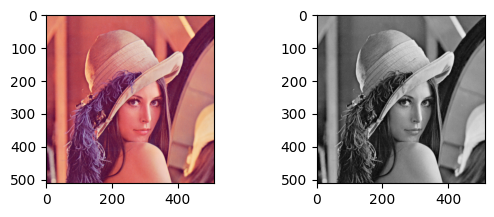

In [15]:
plt.subplot(221)
img = plt.imread('lenna.png')
plt.imshow(img)
print("---image lenna----")
print(img)

img_gray = rgb2gray(img)
plt.subplot(222)
plt.imshow(img_gray, cmap='gray')
print("---image gray----")
print(img_gray)

## 2.黑白化（二值化）

### 2.1.基于灰度化图片进行二值化

#### (1）手动

In [18]:
rows, cols = img_gray.shape
for i in range(rows):
    for j in range(cols):
        if (img_gray[i,j]<=0.5):
            img_gray[i,j]=0
        else:
            img_gray[i,j]=1
print (img_gray)
print("image show gray_simple: %s"%img_gray)
cv2.imshow("image show gray_simple",img_gray)
cv2.waitKey() # 如果不加这个，出不来哦

[[1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
image show gray_simple: [[1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


-1

#### （2）调包

-----imge_binary------
[[1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(512, 512)


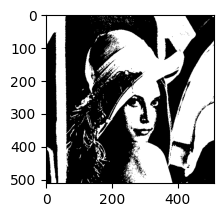

In [25]:
img_binary = np.where(img_gray>=0.5,1,0)
print("-----imge_binary------")
print(img_binary)
print(img_binary.shape)
plt.subplot(223) 
plt.imshow(img_binary, cmap='gray')
plt.show()

### 2.2.基于彩图

#### （1）手动

In [37]:
img = cv2.imread("lenna.png")
h,w = img.shape[:2]
img_gray = np.zeros([h,w],img.dtype) 
for i in range(h):
    for j in range(w):
        m = img[i,j]
        grey_figure = int(m[0]*0.11+m[1]*0.59+m[2]*0.3)
        if grey_figure<=122.5:
            img_gray[i,j] = 0
        else:
            img_gray[i,j] = 225
#         img_gray[i,j] = lambda x : 0 if grey_figure<=122.5 else 225
print (img_gray)
print("image show gray_simple: %s"%img_gray)
cv2.imshow("image show gray_simple",img_gray)
cv2.waitKey() # 如果不加这个，出不来哦

[[225 225 225 ... 225 225 225]
 [225 225 225 ... 225 225 225]
 [225 225 225 ... 225 225 225]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
image show gray_simple: [[225 225 225 ... 225 225 225]
 [225 225 225 ... 225 225 225]
 [225 225 225 ... 225 225 225]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


-1